In [1]:
import iris
import holoviews as hv
hv.notebook_extension()
import geoviews as gv
import param
import paramnb
iris.FUTURE.strict_grib_load = True

/data/local/itmh/mc/c/envs/cubebrowser/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%output widgets='live'
%opts Image [colorbar=True]


In [3]:
class PathPicker(param.Parameterized):
    filepath = param.String('/data/local/itmh/ukvTigge7Feb16')
paramnb.NbParams(PathPicker)

<IPython.core.display.Javascript object>

In [5]:
class CubeLoader(param.Parameterized):
    
    files = paramnb.MultiFileSelector(path='{}/*'.format(PathPicker.filepath))

    cubes = None
    
    @classmethod
    def load(cls, cube_loader):
        cubelist = iris.load(cls.files)
        cubes = {cb.vdims[0].name:cb for cb in [hv.Dataset(c) for c in cubelist]} # Load cubes into dictionary
        cls.cubes = {k:v for k,v in cubes.items() if k!='unknown'}  # Filter as desired

paramnb.NbParams(CubeLoader, callback=CubeLoader.load)

<IPython.core.display.Javascript object>

/net/home/h04/itmh/scitools/iris/lib/iris/fileformats/rules.py:990: UserWarning: Unable to create instance of HybridHeightFactory. The file(s) ['/data/local/itmh/ukvTigge7Feb16/prodm_op_ukv_20160207_03_002.pp', '/data/local/itmh/ukvTigge7Feb16/prodm_op_ukv_20160207_03_000.pp'] don't contain field(s) for 'orography'.
  factory=factory_name))


In [ ]:
class CubeSelect(param.Parameterized):

    cube = param.ObjectSelector(default=CubeLoader.cubes.keys()[0],
                                    objects=list(CubeLoader.cubes.keys()))


    
    cache = {}

    @classmethod
    def view(cls):
        key = (cls.quantity, cls.element)
        if key in CubeBrowser.cache:
            converted = cls.cache[key]
        else:
            holocube = CubeLoader.cubes[cls.quantity]
            ls.cache[key] = converted
paramnb.NbParams(CubeSelect)

<IPython.core.display.Javascript object>

In [ ]:

class ElementSelect(param.Parameterized):
    element = param.ObjectSelector(default=gv.Image,
                                   objects=[gv.Image, gv.FilledContours, gv.LineContours])
    x_axis = param.ObjectSelector(default=CubeLoader.cubes[CubeSelect.cube].data.coords()[0].name(),
                                  objects=[c.name() for c in CubeLoader.cubes[CubeSelect.cube].data.coords()])
paramnb.NbParams(ElementSelect)

<IPython.core.display.Javascript object>

In [9]:
# if the element is a 2D, we'll need a y_axis as well

class YSelect(param.Parameterized):
    available_coords = [c.name() for c in CubeLoader.cubes[CubeSelect.cube].data.coords()]
    available_coords.remove(ElementSelect.x_axis)
    y_axis = param.ObjectSelector(default=available_coords[0],
                                  objects=available_coords)
paramnb.NbParams(YSelect)

<IPython.core.display.Javascript object>

:DynamicMap   [time,model_level_number]
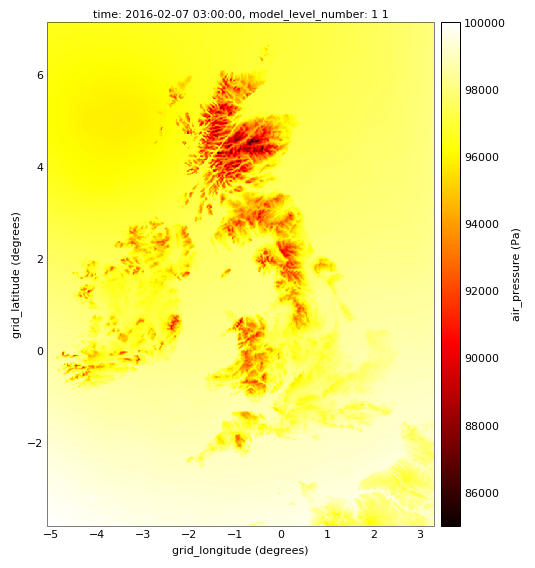

In [10]:
%%output size=250 
CubeLoader.cubes[CubeSelect.cube].to(ElementSelect.element, [ElementSelect.x_axis, YSelect.y_axis], dynamic=True)